[[-0.42804151  1.87762724  0.29483927 -3.08203775  3.09690586  3.05786342
  -2.83705966 -2.40097859  0.49283673 -2.72526706]
 [ 0.80139527  0.99089277 -1.04506916  0.98835648  2.77878411  0.78510872
   1.66292643 -2.53933588 -0.14389167  2.36472452]
 [-1.87307403  2.0319784   0.7071881   2.45637692 -1.99765637  0.55129696
  -2.25985722  1.54979793 -0.03468679  3.06183918]
 [ 1.09394896  1.94512672  2.1989932   0.52342595  1.2596481  -2.6884732
   0.73561318  2.00217982  2.03552602 -0.32526637]
 [-0.81169046 -2.67399741 -1.32511521 -0.31840844 -2.93947846 -1.51974546
  -0.31094273  2.21344097  3.07524114  2.33881985]
 [-1.1847032   0.83306709  3.09100531 -2.06206719  1.53274502 -2.35548816
   0.44776758 -2.07687485  2.97667056  2.31213655]
 [ 2.00668418  0.42298804  0.28626468  2.49058309  3.01561421 -0.01054689
   1.27801183  1.42194759 -2.18237553  2.21104808]
 [-2.6360234  -2.33668913 -1.66700653 -0.65324131  1.88873709  0.05342244
   0.85675617  1.23012077 -1.03262928  1.74873491]
 

C:\Users\yesda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


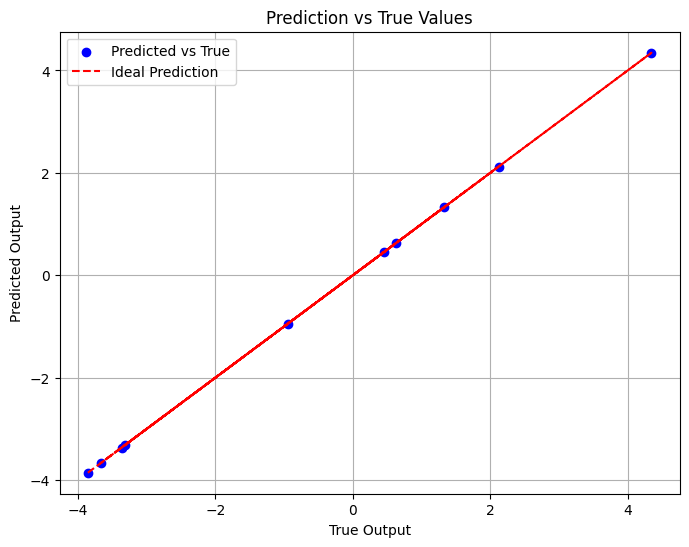

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Generate dataset based on a function y = sin(x1) + cos(x2) + noise
num_samples = 10  # Total samples
num_features = 10  # (5 x, y) coordinate pairs per sample

# Generate x and y values
X = np.random.uniform(-np.pi, np.pi, (num_samples, num_features))  # Inputs in range [-pi, pi]
print(X)
# Define true function: sum of sin and cos for different input pairs
Y_true = np.sum(np.sin(X[:, 0::2]) + np.cos(X[:, 1::2]), axis=1, keepdims=True)
print(Y_true)
# Define ANN model
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(num_features,)),  # Hidden Layer 1
    layers.Dense(16, activation='relu'),  # Hidden Layer 2
    layers.Dense(1)  # Output layer (1 value per sample)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
model.fit(X, Y_true, epochs=200, batch_size=2, verbose=0)  # Train with more epochs for better accuracy

# Make predictions
Y_pred = model.predict(X)

# Plot Predictions vs True Values
plt.figure(figsize=(8, 6))
plt.scatter(Y_true, Y_pred, color='blue', label="Predicted vs True")
plt.plot(Y_true, Y_true, 'r--', label="Ideal Prediction")
plt.xlabel("True Output")
plt.ylabel("Predicted Output")
plt.title("Prediction vs True Values")
plt.legend()
plt.grid(True)
plt.show()
